In [1]:
from ising import *
import matplotlib.pyplot as plt

# Parameters
rows, cols = 20, 20
doping = 0.1
k_f = 0.2
J0 = -1.0
steps = 100000
warmup = 1000
temperature = 1.0

lattice = TriangularLattice(k_f, J0)
lattice.generate_lattice(rows, cols, doping)

lattice.monte_carlo_loop(steps=steps, warmup=warmup, T=temperature)

/home/lisa/Desktop/projects/pt2se/ising.py:62: RuntimeWarning: invalid value encountered in multiply
  + j1(self.kf * distances) * y1(self.kf * distances)
100%|██████████| 100000/100000 [00:01<00:00, 61128.96it/s]


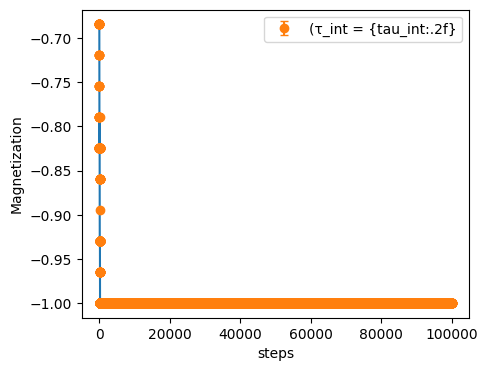

In [2]:
lattice.plot_magnetization()

In [1]:
# Plot autocorrelation for energy
plt.figure(figsize=(6, 4))
plt.plot(energy_autocorr)
plt.xlabel(r"$\tau$")  # Lag symbol
plt.ylabel(r"$C(\tau)$")  # Autocorrelation symbol
plt.title("Autocorrelation of Energy")
plt.show()

# Plot autocorrelation for magnetization
plt.figure(figsize=(6, 4))
plt.plot(magnetization_autocorr)
plt.xlabel(r"$\tau$")  # Lag symbol
plt.ylabel(r"$C(\tau)$")  # Autocorrelation symbol
plt.title("Autocorrelation of Magnetization")
plt.show()

NameError: name 'plt' is not defined

/home/lisa/Desktop/projects/pt2se/ising.py:62: RuntimeWarning: invalid value encountered in multiply
  + j1(self.kf * distances) * y1(self.kf * distances)
100%|██████████| 1000/1000 [00:00<00:00, 64030.29it/s]


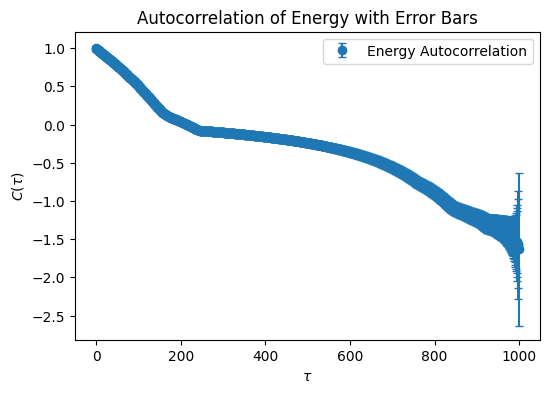

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ising import TriangularLattice

# Parameters
rows, cols = 20, 20
doping = 0.1
k_f = 0.2
J0 = -1.0
steps = 1000
warmup = 100
temperature = 1.0

# Initialize the lattice
lattice = TriangularLattice(k_f, J0)
lattice.generate_lattice(rows, cols, doping)

# Run Monte Carlo simulation
lattice.monte_carlo_loop(steps=steps, warmup=warmup, T=temperature)

# Calculate autocorrelation for energy
energy_autocorr = lattice.autocorrelation(lattice.energy)

# Calculate error bars for autocorrelation
lags = np.arange(len(energy_autocorr))
errors = np.sqrt(1 / (len(lattice.energy) - lags))

# Plot autocorrelation with error bars
plt.figure(figsize=(6, 4))
plt.errorbar(lags, energy_autocorr, yerr=errors, fmt='o', capsize=3, label="Energy Autocorrelation")
plt.xlabel(r"$\tau$")  # Lag symbol
plt.ylabel(r"$C(\tau)$")  # Autocorrelation symbol
plt.title("Autocorrelation of Energy with Error Bars")
plt.legend()
plt.show()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:01<00:00, 70803.42it/s]


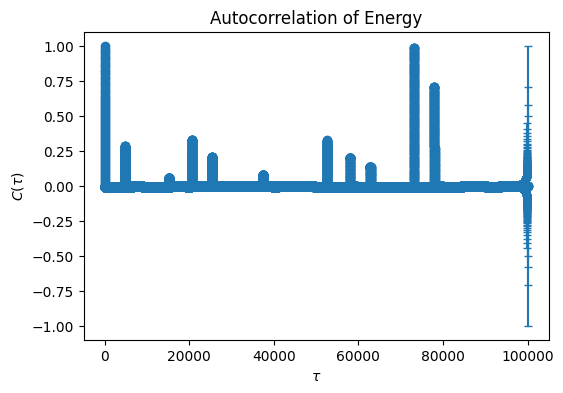

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ising import TriangularLattice

# Parameters
rows, cols = 20, 20
doping = 0.1
k_f = 0.2
J0 = -1.0
steps = 100000
warmup = 1000
temperature = 1.0

# Initialize the lattice
lattice = TriangularLattice(k_f, J0)
lattice.generate_lattice(rows, cols, doping)

# Run Monte Carlo simulation
lattice.monte_carlo_loop(steps=steps, warmup=warmup, T=temperature)

# Calculate autocorrelation for energy
energy_autocorr = lattice.autocorrelation(lattice.energy)

# Calculate error bars for autocorrelation
lags = np.arange(len(energy_autocorr))
errors = np.sqrt(1 / (len(lattice.energy) - lags))

# Plot autocorrelation with error bars
plt.figure(figsize=(6, 4))
plt.errorbar(lags, energy_autocorr, yerr=errors, fmt='o', capsize=3)
plt.xlabel(r"$\tau$")  # Lag symbol
plt.ylabel(r"$C(\tau)$")  # Autocorrelation symbol
plt.title("Autocorrelation of Energy")
plt.show()

In [2]:
np.random.seed(0)
N = 4000
x = np.zeros(N)
alpha = 0.9  
for t in range(1, N):
    x[t] = alpha * x[t - 1] + np.random.normal()

In [3]:
autocorr = lattice.autocorrelation(x)


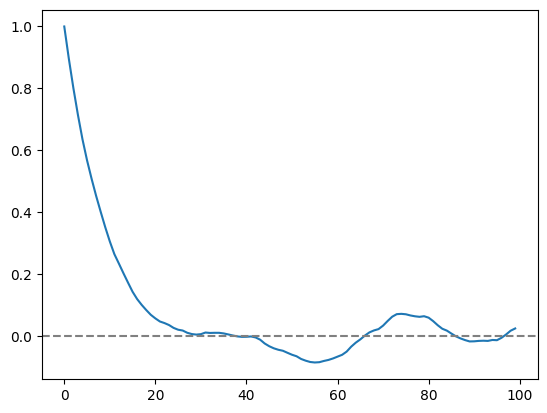

In [4]:
plt.plot(autocorr[:100])
plt.axhline(0, c='gray',ls='--')

In [5]:
tau = lattice.calculate_autocorrelation_time(autocorr)

In [26]:
errors = lattice.calculate_error(autocorr,tau)

In [6]:
tau

np.float64(15.682326423718123)